# HELOC Data Analysis

Name: Nyeongmin Lee <br>
Date: Sep 25 - Oct 8, 2019
<br><br><br>
Assuming the data files are in the same directory.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("HelocData.csv")
df.head(10)

,RiskFlag,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
0,Bad,75,169,2,59,21,0,0,100,-7,...,36,-7,4,4,43,112,4,6,0,83
1,Bad,66,502,4,145,34,0,0,97,36,...,27,4,3,3,80,53,17,3,12,83
2,Good,69,338,2,62,22,0,0,96,12,...,35,0,4,4,25,100,3,2,1,45
3,Good,75,422,1,91,55,0,0,100,-7,...,33,0,4,4,2,11,12,2,1,57
4,Bad,63,242,2,68,25,0,0,100,-7,...,19,-7,3,3,73,-8,12,1,5,87
5,Bad,74,193,1,91,19,0,0,100,-7,...,18,-7,1,1,90,79,6,2,4,73
6,Bad,58,247,2,62,30,0,0,94,1,...,34,9,0,0,62,70,5,2,2,89
7,Good,89,203,6,79,28,0,0,97,62,...,53,20,0,0,8,90,1,2,0,33
8,Good,89,357,1,125,15,0,0,100,-7,...,39,-8,1,0,6,31,4,2,0,55
9,Bad,63,240,4,64,20,1,0,86,45,...,10,4,1,1,67,-8,6,1,3,70


In [2]:
df.shape

(10459, 24)

In [3]:
df1 = df.iloc[:, 1:]

## (1) Missing value frequencies for each feature

In [4]:
a = df1[df1<0].count()
a

x1      598
x2      827
x3      588
x4      588
x5      588
x6      588
x7      588
x8      588
x9     5428
x10     588
x11     588
x12     588
x13     588
x14     588
x15    2919
x16     588
x17     588
x18     774
x19    4007
x20     744
x21    1449
x22    1171
x23     606
dtype: int64

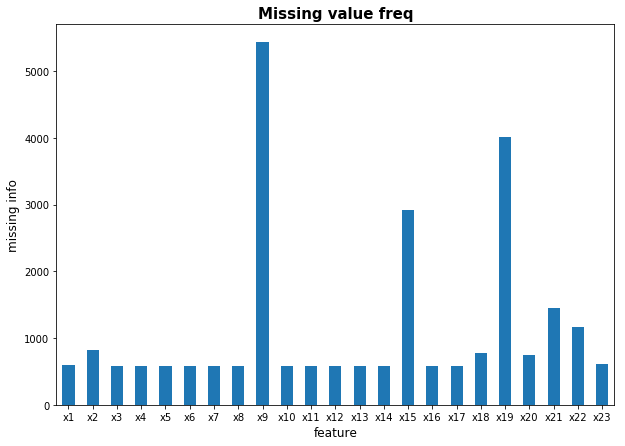

In [5]:
plt.figure(1, figsize=(10,7))
a.plot(kind='bar', rot=0)
plt.xlabel('feature', fontsize=12)
plt.ylabel('missing info', fontsize=12)
plt.title('Missing value freq', fontsize=15, fontweight="bold")
plt.show()

## (2) Split data into training and testing sets

In [6]:
import numpy as np

np.random.seed(3035401370)
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
train.shape

(8385, 24)

In [7]:
# replace train<0 to mean of observed values in each column
train1 = train.iloc[:,1:]
train1[train1<0] = np.nan
train1.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
0,75.0,169.0,2.0,59.0,21.0,0.0,0.0,100.0,NaN,7.0,...,36.0,NaN,4.0,4.0,43.0,112.0,4.0,6.0,0.0,83.0
2,69.0,338.0,2.0,62.0,22.0,0.0,0.0,96.0,12.0,6.0,...,35.0,0.0,4.0,4.0,25.0,100.0,3.0,2.0,1.0,45.0
3,75.0,422.0,1.0,91.0,55.0,0.0,0.0,100.0,NaN,7.0,...,33.0,0.0,4.0,4.0,2.0,11.0,12.0,2.0,1.0,57.0
4,63.0,242.0,2.0,68.0,25.0,0.0,0.0,100.0,NaN,7.0,...,19.0,NaN,3.0,3.0,73.0,NaN,12.0,1.0,5.0,87.0
5,74.0,193.0,1.0,91.0,19.0,0.0,0.0,100.0,NaN,7.0,...,18.0,NaN,1.0,1.0,90.0,79.0,6.0,2.0,4.0,73.0


In [8]:
train1 = train1.fillna(train1.mean())
train1.insert(0,"RiskFlag", df['RiskFlag'])
train1.head()

,RiskFlag,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23
0,Bad,75.0,169.0,2.0,59.0,21.0,0.0,0.0,100.0,21.980382,...,36.0,2.497516,4.0,4.0,43.0,112.000000,4.0,6.0,0.0,83.0
2,Good,69.0,338.0,2.0,62.0,22.0,0.0,0.0,96.0,12.000000,...,35.0,0.000000,4.0,4.0,25.0,100.000000,3.0,2.0,1.0,45.0
3,Good,75.0,422.0,1.0,91.0,55.0,0.0,0.0,100.0,21.980382,...,33.0,0.000000,4.0,4.0,2.0,11.000000,12.0,2.0,1.0,57.0
4,Bad,63.0,242.0,2.0,68.0,25.0,0.0,0.0,100.0,21.980382,...,19.0,2.497516,3.0,3.0,73.0,68.557785,12.0,1.0,5.0,87.0
5,Bad,74.0,193.0,1.0,91.0,19.0,0.0,0.0,100.0,21.980382,...,18.0,2.497516,1.0,1.0,90.0,79.000000,6.0,2.0,4.0,73.0


## (3) Training data by RiskFlag

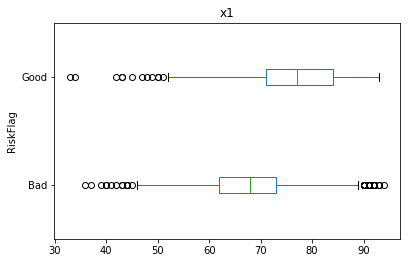

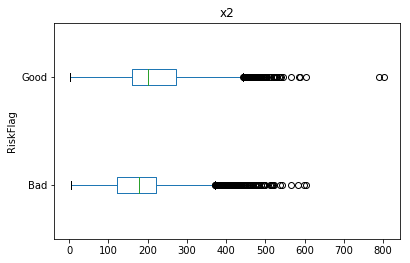

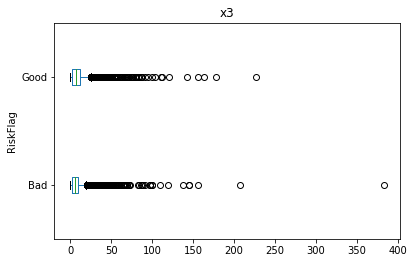

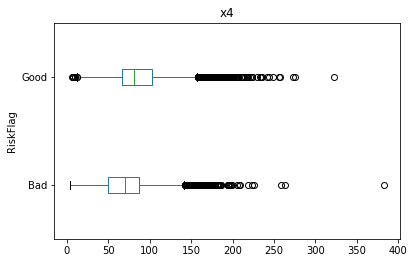

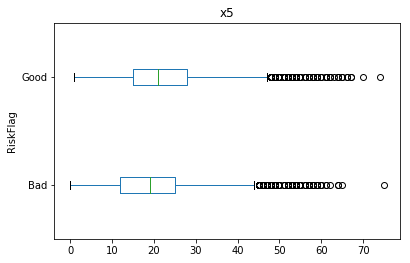

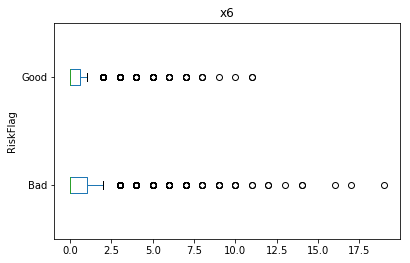

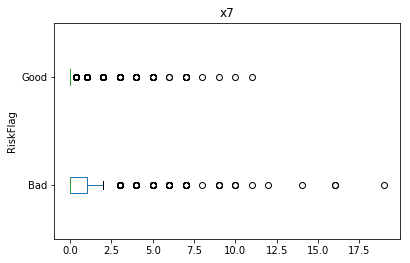

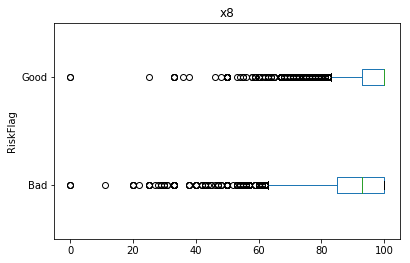

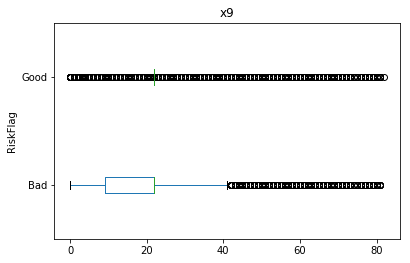

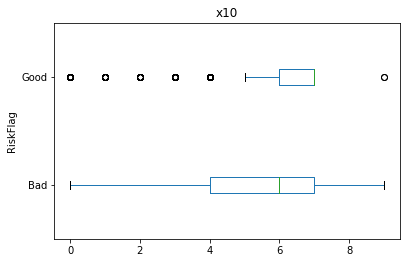

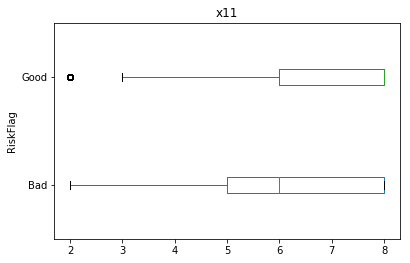

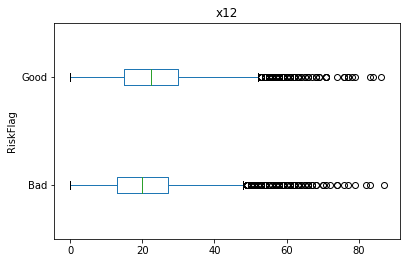

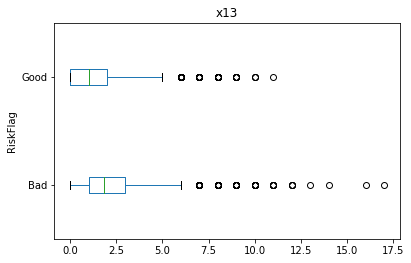

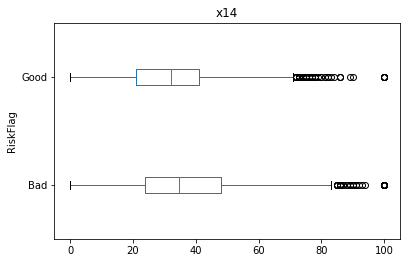

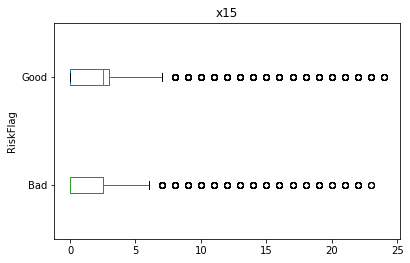

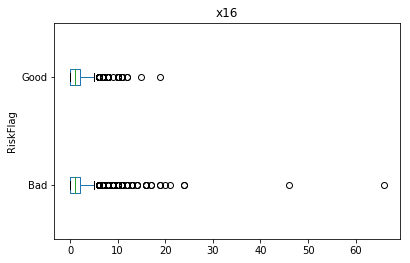

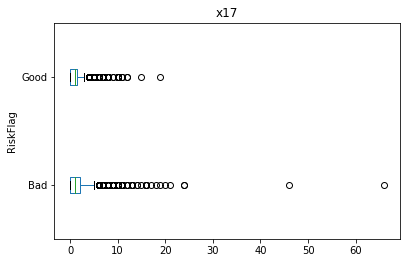

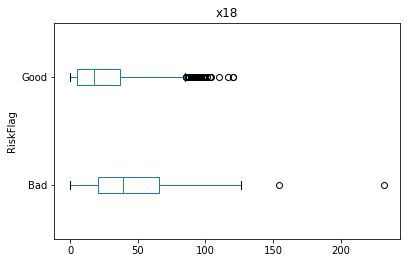

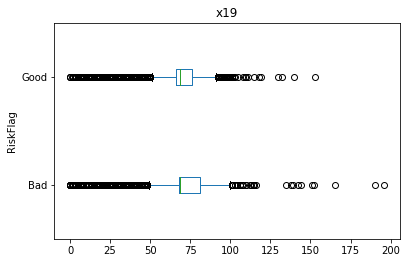

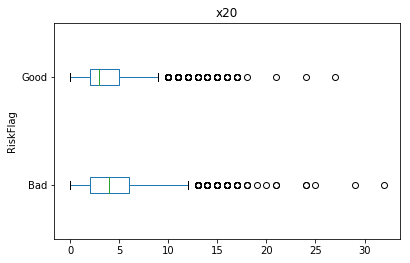

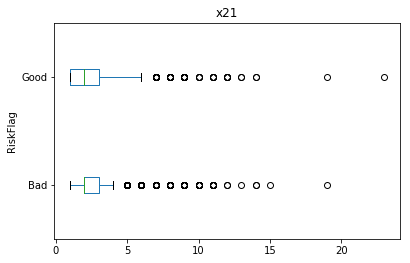

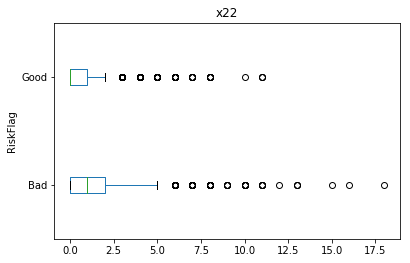

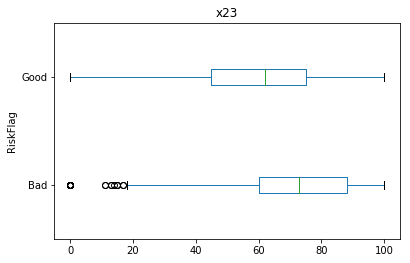

In [9]:
for i in range(1,24):
    train1.boxplot(column='x'+str(i), vert=0, by='RiskFlag')
    plt.suptitle("")
    plt.ylabel("RiskFlag")
    plt.xlabel("")
    plt.grid(b=None)
    plt.show()

## (4) top-5 features
x1, x4, x10, x11, x18

Among 23 features, I chose five that has least overlap between the boxes of good and bad RiskFlag. Since each feature is in different range, one unit difference will have different amount of impact. For that reason, x axes of each are scaled differently. Therefore, I also chose based on the shown scale of boxplot drawn. I first saw the difference between median, saw the first and third quartiles, then minimum and maximum.<br><br>
First, I excluded the ones with missing values over 10%, due to their unreliability, found from question (1); x9, x15, x19, x21, x22. Then, I excluded the ones that boxes are in very similar positions and median of good and bad RiskFlag is very close to each other; x3, x5, x6, x7, x12, x14, x16, x17.<br><br>
Then, I chose the ones that median of one is greater than other's third quartile or smaller than other's first quartile, like x1. x10, x11 and x18 are close to this classification as well so I chose them as well.
Among the rest of features, since they were quite similar in boxplots, I chose the ones with most distinct median and 1st & 3rd quartiles in <b>real</b> scale. x2 and x4 were the best choices. I chose x4 over x2 since Good RiskFlag is clear to have greater x4 value compared to Bad RiskFlag, from minimum to maximum. Also, the outliers seems to have greater value for Good. Therefore,I thought x4 will have more significant affect on model than x2.<br><br>
<b>Final choices of features: x1, x4, x10, x11, and x18</b>

### Chosen features:

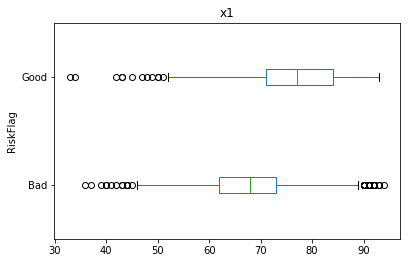

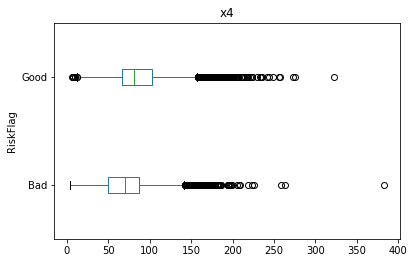

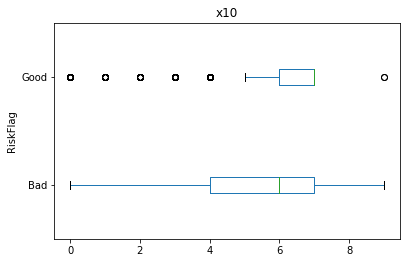

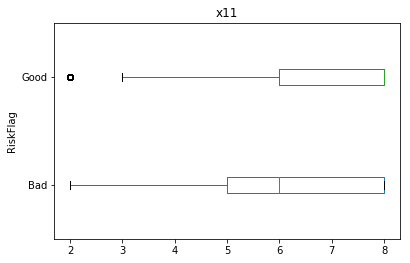

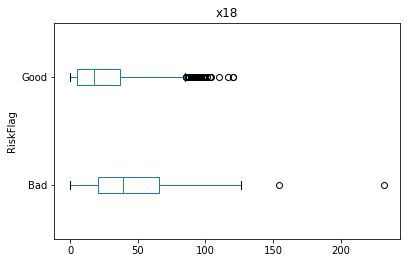

In [10]:
for i in [1,4,10,11,18]:
    train1.boxplot(column='x'+str(i), vert=0, by='RiskFlag')
    plt.suptitle("")
    plt.ylabel("RiskFlag")
    plt.xlabel("")
    plt.grid(b=None)
    plt.show()

In [11]:
x_train = train1.loc[:,['x1','x4','x10','x11','x18']]
y_train = train1.iloc[:,0]
y_train = y_train.replace(to_replace=['Bad', 'Good'], value=[0, 1])
x_test = test.loc[:,['x1','x4','x10','x11','x18']]
y_test = test.iloc[:,0]
y_test = y_test.replace(to_replace=['Bad', 'Good'], value=[0, 1])

In [12]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
X1 = sm.add_constant(x_train)
logreg = LogisticRegression(C=1e8, solver='newton-cg')
logreg = sm.Logit(y_train, X1).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.574808
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               RiskFlag   No. Observations:                 8385
Model:                          Logit   Df Residuals:                     8379
Method:                           MLE   Df Model:                            5
Date:                Sun, 03 Nov 2019   Pseudo R-squ.:                  0.1697
Time:                        16:12:00   Log-Likelihood:                -4819.8
converged:                       True   LL-Null:                       -5804.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.1905      0.293    -21.137      0.000      -6.765      -5.616
x1             0.0703      0.

C:\Users\hadje\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


All features have p-value smaller than 0.05, and therefore all of them will be considered significant and included in the model. The rank of them is the order of absolute value of z values, x1, x4, x18, x11, x10.

## (5) Test performance

In [13]:
from sklearn.linear_model import LogisticRegression
import numpy as np

logreg = LogisticRegression(C=1e8, solver='newton-cg')
logreg.fit(x_train, y_train)
print("Intercept :", np.round(logreg.intercept_,4))
print("Coefficient :", np.round(logreg.coef_,4))

Intercept : [-6.1905]
Coefficient : [[ 0.0703  0.0097  0.0515  0.0566 -0.0115]]


In [14]:
# accuracy of train dataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred_train = logreg.predict(x_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print(np.round(accuracy_train, 4))

0.7071


In [15]:
# accuracy of test dataset
logreg_test = LogisticRegression(C=1e8, solver='newton-cg')
logreg_test.fit(x_test, y_test)
y_pred_test = logreg_test.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(np.round(accuracy_test, 4))

0.6847


Accuracy of <b>training data</b> using the logistic regression model: 71%<br>
Accuracy of <b>testing data</b> using the logistic regression model: 68%<br><br>
There may be some ways to improve the accuracy of logistic regression model. For example, including more features to the model, or removing the missing values for each features separately, instead of replacing them with the median value.
### Extra: Using Top-10 features

In [16]:
x_train2 = train1.loc[:,['x1','x2','x4','x8','x10','x11','x13','x18','x20','x23']]
y_train2 = train1.iloc[:,0]
y_train2 = y_train2.replace(to_replace=['Bad', 'Good'], value=[0, 1])
x_test2 = test.loc[:,['x1','x2','x4','x8','x10','x11','x13','x18','x20','x23']]
y_test2 = test.iloc[:,0]
y_test2 = y_test2.replace(to_replace=['Bad', 'Good'], value=[0, 1])

X1 = sm.add_constant(x_train2)
logreg2 = LogisticRegression(C=1e8, solver='newton-cg')
logreg2 = sm.Logit(y_train2, X1).fit()
print(logreg2.summary())

Optimization terminated successfully.
         Current function value: 0.570352
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               RiskFlag   No. Observations:                 8385
Model:                          Logit   Df Residuals:                     8374
Method:                           MLE   Df Model:                           10
Date:                Sun, 03 Nov 2019   Pseudo R-squ.:                  0.1761
Time:                        16:12:00   Log-Likelihood:                -4782.4
converged:                       True   LL-Null:                       -5804.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.9069      0.372    -18.570      0.000      -7.636      -6.178
x1             0.0580      0.

C:\Users\hadje\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
# training dataset
logreg2 = LogisticRegression(C=1e8, solver='newton-cg')
logreg2.fit(x_train2, y_train2)

y_pred_train2 = logreg2.predict(x_train2)
accuracy_train2 = accuracy_score(y_train2, y_pred_train2)
print(np.round(accuracy_train2, 4))

0.7115


In [18]:
# testing dataset
logreg_test2 = LogisticRegression(C=1e8, solver='newton-cg')
logreg_test2.fit(x_test2, y_test2)
y_pred_test2 = logreg_test2.predict(x_test2)
accuracy_test2 = accuracy_score(y_test2, y_pred_test2)
print(np.round(accuracy_test2, 4))

0.702


As shown above, the prediction of test dataset has better accuracy compared to using 5-top features.